In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("materials_collected.csv")

In [3]:
df['Year'] = pd.to_numeric(df['Financial Year'].str[:4])

In [4]:
df['Area Code'].unique()

array(['95AA', '95BB', '95CC', '95DD', '95EE', '95FF', '95GG', '95HH',
       '95II', '95JJ', '95KK', '95LL', '95MM', '95NN', '95OO', '95PP',
       '95QQ', '95RR', '95SS', '95TT', '95UU', '95VV', '95WW', '95XX',
       '95YY', '95ZZ', 'N09000001', 'N09000011', 'N09000002', 'N09000003',
       'N09000004', 'N09000005', 'N09000006', 'N09000007', 'N09000008',
       'N09000009', 'N09000010'], dtype=object)

In [5]:
df

,Financial Year,Area Code,Glass,Metal,Paper,Plastic,Compost,Electrical Goods,Construction Demolition,Textiles,Wood,Other,Year
0,2012/13,95AA,140.30,180.70,108.20,29.00,2098.50,131.30,3159.10,46.50,773.00,62.40,2012
1,2012/13,95AA,68.70,58.10,43.40,15.10,1357.30,260.90,586.70,6.20,347.20,16.40,2012
2,2012/13,95AA,70.80,85.40,52.20,0.00,845.60,118.10,312.30,17.30,384.90,19.90,2012
3,2012/13,95BB,49.72,72.67,31.21,0.00,223.00,91.61,0.00,5.45,168.76,17.98,2012
4,2012/13,95BB,61.87,0.57,29.84,0.00,296.00,50.37,0.00,6.86,0.00,6.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2017/18,N09000010,9.00,41.52,32.62,12.96,174.87,36.64,53.24,5.87,77.52,2.48,2017
584,2017/18,N09000010,26.87,130.25,136.52,40.44,793.93,123.71,167.14,24.99,290.40,52.98,2017
585,2017/18,N09000010,21.57,96.19,99.81,31.42,606.37,78.26,170.44,11.81,219.00,9.79,2017
586,2017/18,N09000010,13.05,72.08,86.83,28.58,364.95,122.14,117.00,14.90,245.73,27.68,2017


In [39]:
def plot_material(df, material, area=None):
    if area != None:
        df = df.loc[df['Area Code'] == area]
    df = df.groupby(['Year'])[material].sum().reset_index(name =material)
    
    X = df['Year'].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = df[material].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    
    X_pred = np.append(X, [[2020]]).reshape(-1, 1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    future_pred = linear_regressor.predict([[2022]])  # make predictions
    
    print("\t\t", df.corr()['Year'][material])
    print("\t\t\t", future_pred)
    
    plt.scatter(X, Y)
    print(Y_pred)
    plt.plot(X_pred, Y_pred, color='red')
    plt.show()

In [40]:
#what are two other factors you would want to consider other than correlation in trying to make predictions about future needs of each material?
##which locations are growing/underperforming
##what new products are going to be added or discontinued
##total output of each area
## efficiency of each area

Glass
		 -0.23021269220068613
			 [[4414.41538095]]
[[4735.56109524]
 [4703.44652381]
 [4671.33195238]
 [4639.21738095]
 [4607.10280952]
 [4574.9882381 ]
 [4478.64452381]]


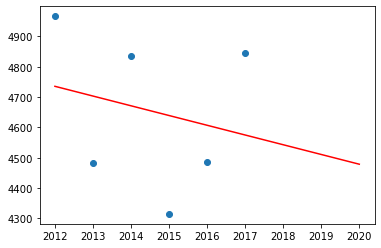

Metal
		 0.974726566935229
			 [[17268.79190476]]
[[ 7049.00047619]
 [ 8070.97961905]
 [ 9092.9587619 ]
 [10114.93790476]
 [11136.91704762]
 [12158.89619048]
 [15224.83361905]]


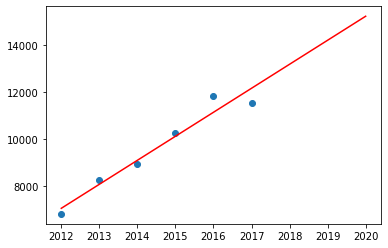

Paper
		 0.9770151202094572
			 [[11114.20385714]]
[[ 6867.26671429]
 [ 7291.96042857]
 [ 7716.65414286]
 [ 8141.34785714]
 [ 8566.04157143]
 [ 8990.73528571]
 [10264.81642857]]


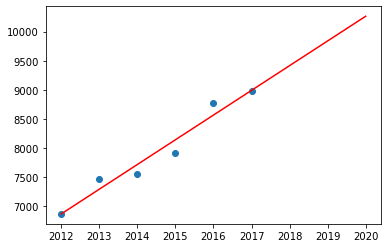

Plastic
		 0.9540493692089288
			 [[6696.79019048]]
[[1881.33704762]
 [2362.8823619 ]
 [2844.42767619]
 [3325.97299048]
 [3807.51830476]
 [4289.06361905]
 [5733.6995619 ]]


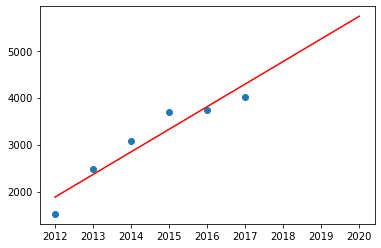

Compost
		 0.938110387942294
			 [[81702.86461905]]
[[51241.78890476]
 [54287.89647619]
 [57334.00404762]
 [60380.11161905]
 [63426.21919048]
 [66472.32676191]
 [75610.64947619]]


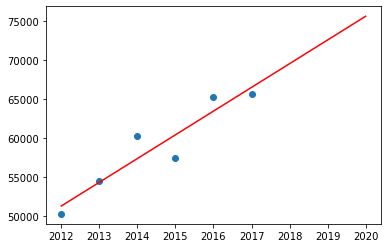

Electrical Goods
		 0.8070261832634471
			 [[18001.72419048]]
[[11478.39304762]
 [12130.7261619 ]
 [12783.05927619]
 [13435.39239048]
 [14087.72550476]
 [14740.05861905]
 [16697.0579619 ]]


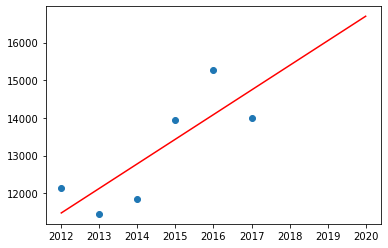

Construction Demolition
		 0.9865168517077467
			 [[48901.08842857]]
[[24886.26785714]
 [27287.74991429]
 [29689.23197143]
 [32090.71402857]
 [34492.19608571]
 [36893.67814286]
 [44098.12431429]]


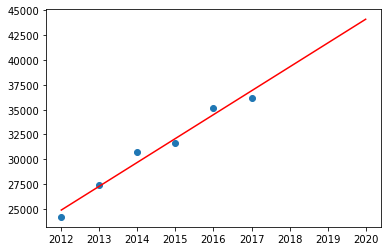

Textiles
		 0.832515061628999
			 [[3401.37052381]]
[[1284.06538095]
 [1495.79589524]
 [1707.52640952]
 [1919.25692381]
 [2130.9874381 ]
 [2342.71795238]
 [2977.90949524]]


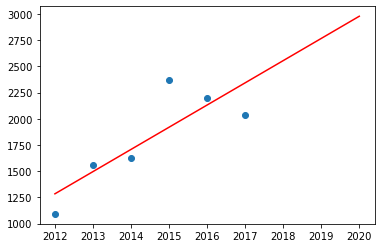

Wood
		 0.9897633928833902
			 [[56489.10738095]]
[[21793.10509524]
 [25262.70532381]
 [28732.30555238]
 [32201.90578095]
 [35671.50600952]
 [39141.1062381 ]
 [49549.90692381]]


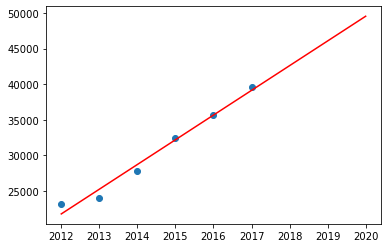

Other
		 0.9077656717786312
			 [[7980.45238095]]
[[3120.49409524]
 [3606.48992381]
 [4092.48575238]
 [4578.48158095]
 [5064.47740952]
 [5550.4732381 ]
 [7008.46072381]]


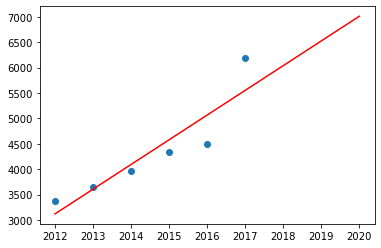

In [41]:
for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'float64':
        print(column)
        plot_material(df, column)

In [20]:
for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'float64':
        print(column)
        for area in df['Area Code'].unique():
            print("\t", area)
            plot_material(df, column, area)

Glass
	 95AA
		 -0.9856815874889335
			 [[226.33333333]]
	 95BB
		 -0.2857785823884549
			 [[348.905]]
	 95CC
		 -0.9521558825059447
			 [[139.0615]]
	 95DD
		 nan
			 [[0.]]
	 95EE
		 -0.8880470769182699
			 [[-20.13]]
	 95FF
		 -0.874363413422757
			 [[-288.121]]
	 95GG
		 0.6550925174931667
			 [[2005.725]]
	 95HH
		 0.8857317649517634
			 [[193.33033333]]
	 95II
		 -0.9999884705129105
			 [[103.06166667]]
	 95JJ
		 -0.8976056672106417
			 [[-195.52216667]]
	 95KK
		 -0.9882583159297951
			 [[-131.224]]
	 95LL
		 -0.27322463877681336
			 [[164.31833333]]
	 95MM
		 -0.4293554387254134
			 [[154.27566667]]
	 95NN
		 0.9891290193221544
			 [[526.47166667]]
	 95OO
		 -0.9034439859821112
			 [[-374.0195]]
	 95PP
		 0.9996067254186666
			 [[1467.66616667]]
	 95QQ
		 0.8712031348849205
			 [[162.97666667]]
	 95RR
		 -0.9959932657157492
			 [[-89.1525]]
	 95SS
		 -0.9402922375624058
			 [[62.63266667]]
	 95TT
		 0.9884850353341817
			 [[282.4275]]
	 95UU
		 0.03383501528090028
			 [[4.53633

		 0.87208405144786
			 [[5533.88333333]]
	 95XX
		 0.9991209432159336
			 [[5694.59]]
	 95YY
		 0.9650954968310519
			 [[3518.36666667]]
	 95ZZ
		 0.9984987673427171
			 [[1805.35166667]]
	 N09000001
		 0.8325454840205847
			 [[12877.25333333]]
	 N09000011
		 0.9674690600492872
			 [[7717.65333333]]
	 N09000002
		 0.9360531622820363
			 [[9818.75333333]]
	 N09000003
		 0.8780897475394674
			 [[4464.40666667]]
	 N09000004
		 0.13855356939841426
			 [[7677.11666667]]
	 N09000005
		 0.6546917145495079
			 [[5121.51666667]]
	 N09000006
		 0.8263032147699848
			 [[4750.86]]
	 N09000007
		 0.9437524772113116
			 [[7973.96666667]]
	 N09000008
		 0.9249736862863628
			 [[3012.54666667]]
	 N09000009
		 0.957179926590929
			 [[18718.232]]
	 N09000010
		 0.5327908204483741
			 [[5376.75333333]]
Electrical Goods
	 95AA
		 0.10301493412408769
			 [[516.71666667]]
	 95BB
		 -0.5973605561114628
			 [[611.905]]
	 95CC
		 0.9028894169485425
			 [[477.8675]]
	 95DD
		 0.8704102260658227
			 [[515.72366

		 -0.5840386507482853
			 [[28.17166667]]
	 N09000001
		 -0.5634506426949856
			 [[261.82666667]]
	 N09000011
		 0.9958717757280678
			 [[671.13333333]]
	 N09000002
		 0.5738573182138244
			 [[415.71666667]]
	 N09000003
		 0.9810087545963262
			 [[1219.50666667]]
	 N09000004
		 0.927238781471136
			 [[449.33666667]]
	 N09000005
		 0.7557225462912042
			 [[3361.853]]
	 N09000006
		 0.981341248718937
			 [[2688.449]]
	 N09000007
		 0.9273221520784569
			 [[272.64266667]]
	 N09000008
		 0.9598092813310324
			 [[713.97366667]]
	 N09000009
		 0.9638544292509531
			 [[260.94133333]]
	 N09000010
		 0.5481231997652026
			 [[281.462]]
